# **Veri Görselleştirme**

## Python ile Veri Görselleştirme Kütüphaneleri

* Matplotlib
* Pandas
* Seaborn
* ggplot
* Bokeh
* Plot.ly

## Veriye İlk Bakış

**Veri setinin hikayesi ve yapısının incelenmesi**

In [1]:
import seaborn as sns
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [2]:
df = planets.copy()

Öncelikle orjinal veri setinin yapısını korumak için .copy() komutu ile veri seti, df isimli bir değişkene kopyalanmaktadır.

In [3]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [4]:
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


**Veri setinin yapısal bilgileri**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [6]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

Object tipi kategorik değişkeni tanımlamaktadır. Bazı durumlarda object tipi string olarak algılanabildiği için bu tipi kategori tipine dönüştürmek önemlidir. Aşağıdaki kod bloğunda bu işlem yapılmıştır.

In [7]:
import pandas as pd
df.method = pd.Categorical(df.method)

In [8]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

## Veri Setinin Betimlenmesi

In [11]:
import seaborn as sns
planets = sns.load_dataset("planets")
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [13]:
df.shape

(1035, 6)

In [14]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


.describe() komutu eksik gözlemleri gözardı eder ve kategorik değişkenleri dışarıda bırakır. Kategorik değişkenleri tabloya almasi için include = "all" argümanı kullanılabilir.

In [16]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
method,1035,10,Radial Velocity,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,1035,NaN,NaN,NaN,1.78551,1.24098,1,1,1,2,7
orbital_period,992,NaN,NaN,NaN,2002.92,26014.7,0.0907063,5.44254,39.9795,526.005,730000
mass,513,NaN,NaN,NaN,2.63816,3.81862,0.0036,0.229,1.26,3.04,25
distance,808,NaN,NaN,NaN,264.069,733.116,1.35,32.56,55.25,178.5,8500
year,1035,NaN,NaN,NaN,2009.07,3.97257,1989,2007,2010,2012,2014


## Eksik Değerlerin İncelenmesi

In [17]:
import seaborn as sns
planets = sns.load_dataset("planets")
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


**Hiç eksik gözlem (değer) var mı?**

In [18]:
df.isnull().values.any()

True

**Hangi değişkende kaç tane eksik gözlem var?**

In [19]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

Bütün eksik gözlemlere 0 değeri atamak için *df["degisken_ismi"].fillna(0, inplace = True)* kodu çalıştırılır.

Bütün eksik gözlemlere o değişkenin ortalamasını atamak için *df["degisken_ismi"].fillna(df.degisken_ismi.mean(), inplace = True)* kodu çalıştırılır. 0 atamak yerine daha fazla tercih edilir.

Veri setindeki tüm eksik değerler yerine ortalamalarını atamak için *df.fillna(df.mean(), inplace = True)* kodu çalıştırılır.

In [26]:
df.fillna(df.mean(), inplace = True)

In [27]:
df.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

## Kategorik Değişken Özetleri

In [1]:
import seaborn as sns
planets = sns.load_dataset("planets")
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


**Sadece Kategorik Değişkenler ve Özetleri**

In [2]:
kat_df = df.select_dtypes(include = ["object"])

In [3]:
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


**Kategorik Değişkenin Sınıflarına ve Sınıf Sayısına Erişmek**

In [7]:
kat_df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [7]:
kat_df["method"].value_counts().count()

10

**Kategorik Değişkenin Sınıflarının Frekanslarına Erişmek**

In [35]:
kat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

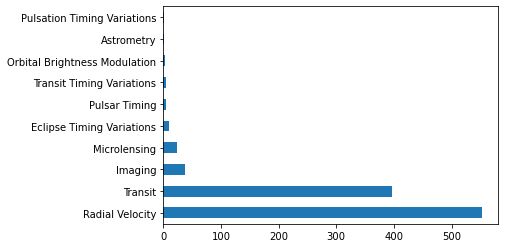

In [38]:
df["method"].value_counts().plot.barh();

## Sürekli Değişken Özetleri

In [43]:
import seaborn as sns
planets = sns.load_dataset("planets")
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [44]:
df_num = df.select_dtypes(include = ["float64", "int64"])

In [45]:
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [46]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [47]:
print("Ortalama:" + str(df_num["distance"].mean()))
print("Dolu Gözlem Sayısı:" + str(df_num["distance"].count()))
print("Maksimum Değer:" + str(df_num["distance"].max()))
print("Minimum Değer:" + str(df_num["distance"].min()))
print("Medyan:" + str(df_num["distance"].median()))
print("Standart Sapma:" + str(df_num["distance"].std()))

Ortalama:264.06928217821786
Dolu Gözlem Sayısı:808
Maksimum Değer:8500.0
Minimum Değer:1.35
Medyan:55.25
Standart Sapma:733.1164929404422


# Sütun Grafik (Bar Plot)

**Veri Seti Hikayesi**
* price: Dolar cinsinden fiyat (326-18,823)
* carat: Ağırlık (0.2-5.01)
* cut: Kalite (Fair, Good, Very Good, Premium, İdeal)
* color: Renk (from J (worst) to D (best))
* clarity: Berraklığı (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* x: Milimetre cinsinden uzunluğu (0-10.74)
* y: Milimetre cinsinden genişliği (0-58.9)
* z: Milimetre cinsinden derinliği (0-31.8)
* derinlik: Toplam Derinlik Yüzdesi = z/mean(x,y) = 2*z/(x+y) (43-79)
* table: Elmasın en geniş noktasına göre genişliği (43-95)

In [8]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [55]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [56]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [57]:
df["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

**Ordinal Tanımlama (Kaliteye Göre Sıralama)**

In [58]:
from pandas.api.types import CategoricalDtype

In [59]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [61]:
df.cut = df.cut.astype(CategoricalDtype(ordered = True))

In [62]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [64]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [65]:
cut_kategoriler = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

In [66]:
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))

In [67]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

## Sütun Grafiğin Oluşturulması

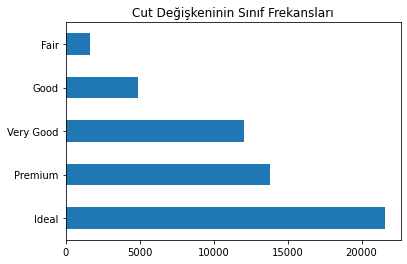

In [72]:
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansları");

Kodu görselleştirmek için;

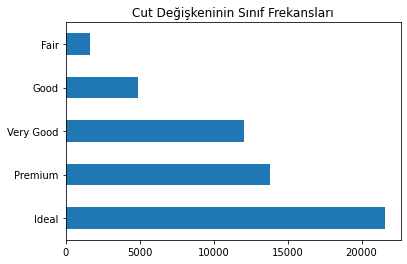

In [73]:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin Sınıf Frekansları"));

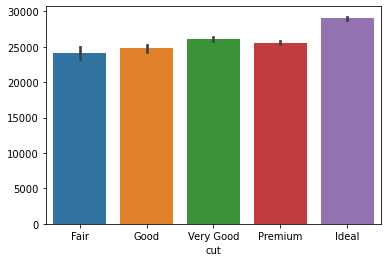

In [74]:
import seaborn as sns
sns.barplot(x = "cut", y = df.cut.index, data = df);

## Sütun Grafik Çaprazlamalar

In [85]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
cut_kategoriler = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


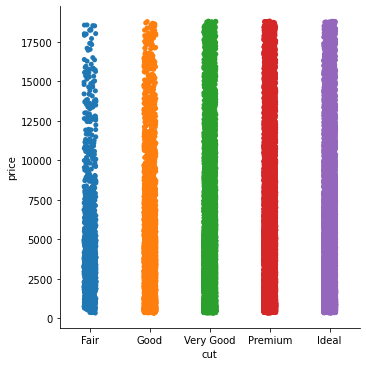

In [86]:
sns.catplot(x = "cut", y = "price", data = df);

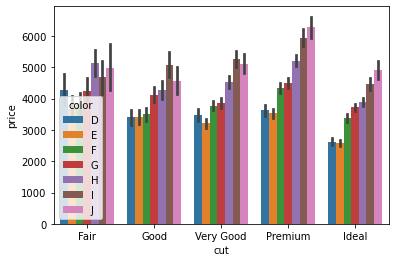

In [87]:
sns.barplot(x = "cut", y = "price", hue = "color", data = df);

Grafiği doğrulamak için;

In [93]:
df.groupby(["cut", "color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

# Histogram ve Yoğunluk Grafikleri

In [95]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


C:\Users\brkay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


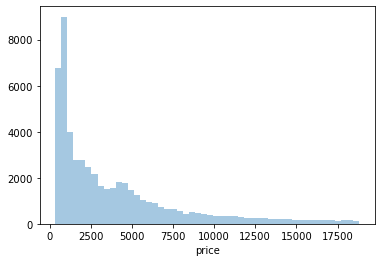

In [96]:
sns.distplot(df.price, kde = False);

kde = False argümanı olasılık yoğunluk fonksiyonu çizgisini kaldırır.

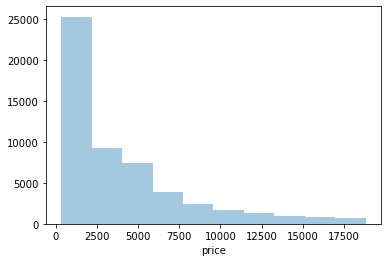

In [99]:
sns.distplot(df.price, bins = 10, kde = False);

Bins argümanı 10 olursa 10 çubuk olacak şekilde histogram oluşturulur.

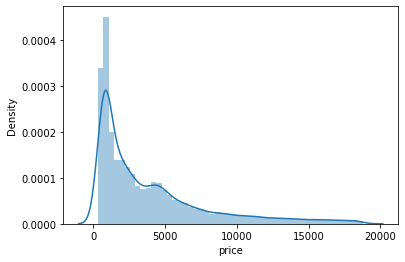

In [100]:
sns.distplot(df.price);

C:\Users\brkay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


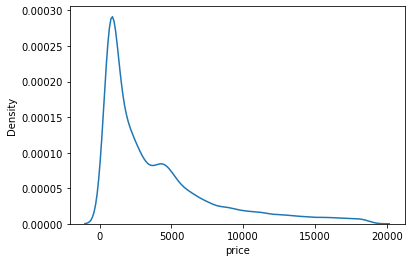

In [101]:
sns.distplot(df.price, hist = False);

hist = False argümanı histogramı kaldırır.

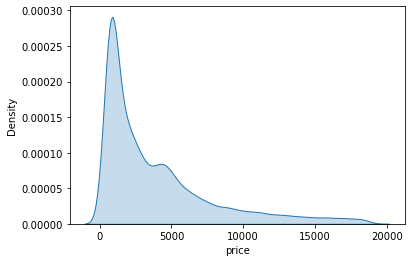

In [102]:
sns.kdeplot(df.price, shade = True);

.kdeplot fonksiyonu ve shade = True argümanı ile yoğunluk fonksiyonunun altı dolu hali gözlemlenebilir.

## Çaprazlamalar

In [103]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


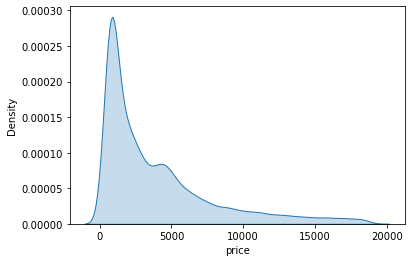

In [104]:
sns.kdeplot(df.price, shade = True);

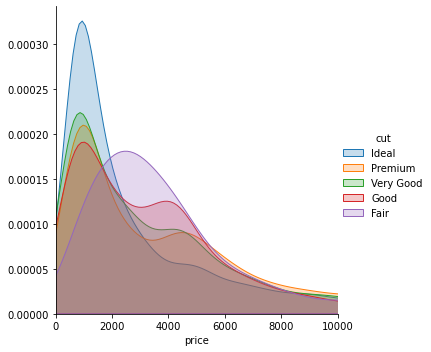

In [105]:
(sns
 .FacetGrid(df,
              hue = "cut",
              height = 5,
              xlim = (0, 10000))
 .map(sns.kdeplot, "price", shade = True)
 .add_legend()
);

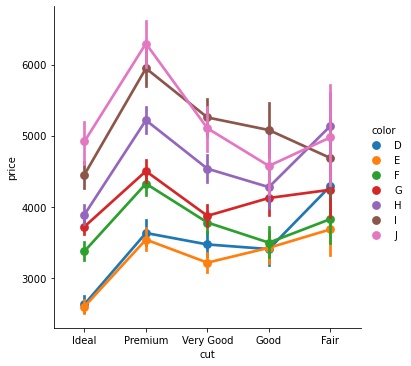

In [106]:
sns.catplot(x = "cut", y = "price", hue = "color", kind = "point", data = df);

# Kutu Grafik (Box Plot)

**Veri Seti Hikayesi**
* total_bill: Yemeğin toplam fiyatı (bahşiş ve vergi dahil)
* tip: Bahşiş
* sex: Ücreti ödeyen kişinin cinsiyeti (0=Erkek, 1=Kadın)
* smoker: Grupta sigara içen var mı? (0=Hayır, 1=Evet)
* day: Gün (3=Perşembe, 4=Cuma, 5=Cumartesi, 6=Pazar)
* time: Ne zaman? (0=Sabah, 1=Akşam)
* size: Grupta kaç kişi var?

In [107]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [108]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [116]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [121]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [122]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [123]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

## Kutu Grafiğin Oluşturulması

In [228]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


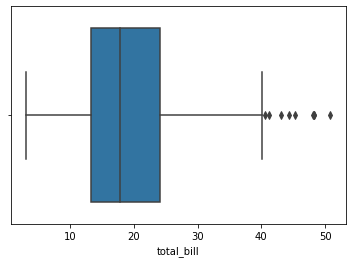

In [230]:
sns.boxplot(x = df["total_bill"]);

Kutu grafiğinin en solundaki çizgi minimum değeri, kutu kısmındaki ilk çizgi %25'lik değeri, ortadaki çizgi %50'lik değeri (medyanı), son çizgi %75'lik değeri ve en sağdaki nokta maksimum değeri ifade eder.Sondaki noktalar aykırı değerleri gösterir.

## Kutu Grafik Çaprazlamalar

In [130]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Hangi günler daha fazla kazanılıyor?**

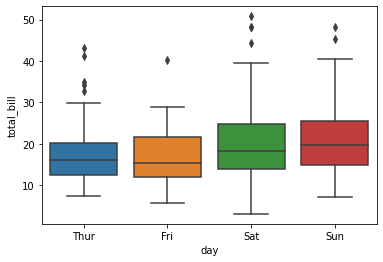

In [133]:
sns.boxplot(x = "day", y = "total_bill", data = df);

Pazar günü en fazla kazanılıyor.

In [135]:
df.groupby("day")["total_bill"].mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

**Sabah mı yoksa akşam mı daha fazla kazanılıyor?**

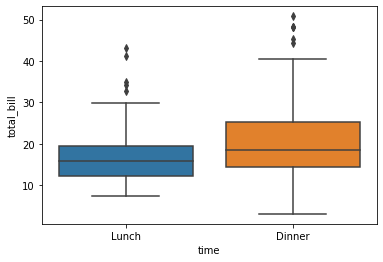

In [138]:
sns.boxplot(x = "time", y = "total_bill", data = df);

Akşamları daha fazla kazanılıyor.

**Kaç kişi geldiğinde en çok kazanılıyor?**

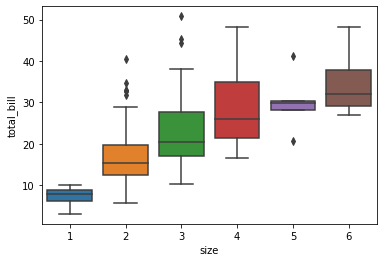

In [139]:
sns.boxplot(x = "size", y = "total_bill", data = df);

6 kişi geldiğinde en çok kazanılıyor.

**Günlere göre hangi cinsiyet en fazla hesap ödemiş?**

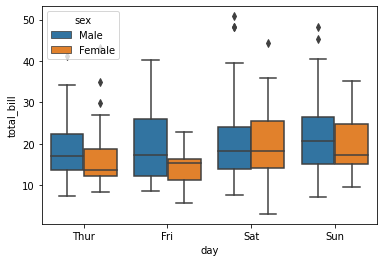

In [141]:
sns.boxplot(x = "day", y = "total_bill", hue = "sex", data = df);

# Violin Grafik

In [142]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


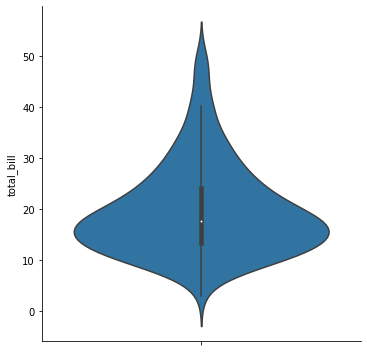

In [144]:
sns.catplot(y = "total_bill", kind = "violin", data = df);

## Violin Grafik Çaprazlamalar

In [145]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()

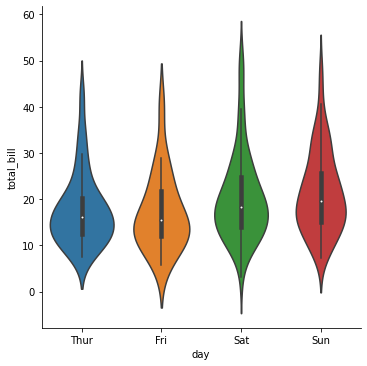

In [147]:
sns.catplot(x = "day", y = "total_bill", kind = "violin", data = df);

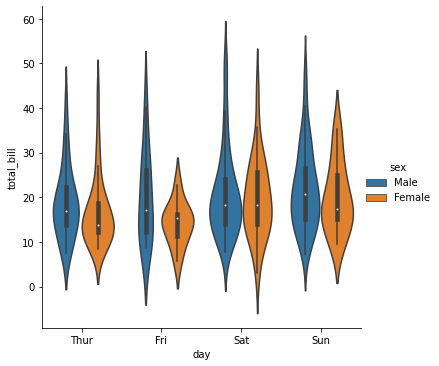

In [148]:
sns.catplot(x = "day", y = "total_bill", hue = "sex", kind = "violin", data = df);

# Korelasyon Grafikleri

Korelasyon, değişkenler arasındaki ilişkiyi ifade eden istatistiksel bir terimdir. İki değişken arasındaki ilişkiyi ifade etmek için kullanılan ve en çok bilinen yaklaşım "Scatterplot" (saçılım grafiği) yaklaşımıdır. Scatterplot, sayısal değişkenler arasındaki ilişkiyi gösterir.

## Scatterplot

In [149]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()

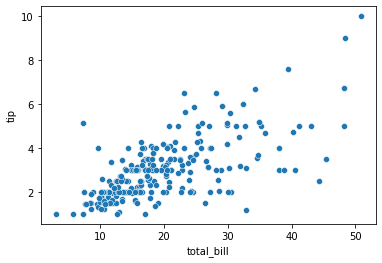

In [150]:
sns.scatterplot(x = "total_bill", y = "tip", data = df);

Ödenen toplam hesap ile bahşiş arasındaki ilişki görselleştirilmiştir. Ödenen hesabın artmasıyla bahşişin arttığı gözlemlenebilir.

## Kolerasyon Çaprazlamalar

In [151]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()

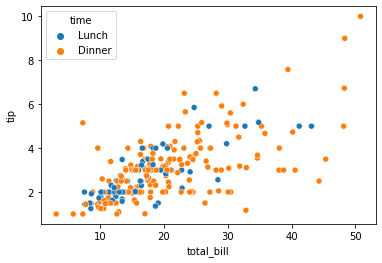

In [152]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", data = df);

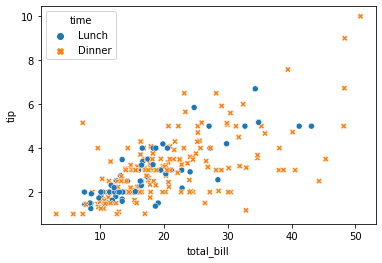

In [153]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", style = "time", data = df);

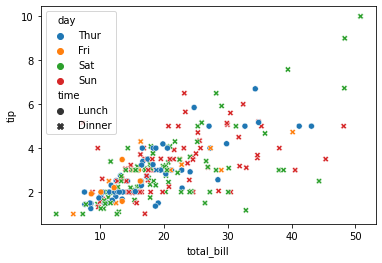

In [155]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "day", style = "time", data = df);

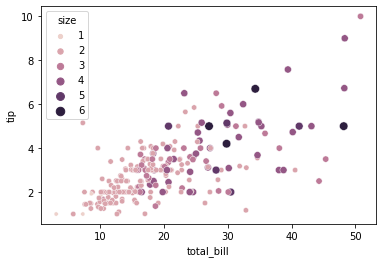

In [160]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "size", size = "size", data = df);

## Doğrusal İlişkini Gösterilmesi

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")
df = tips.copy()

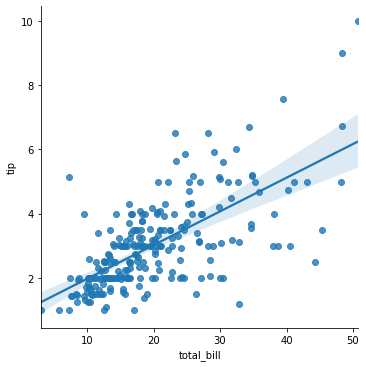

In [164]:
sns.lmplot(x = "total_bill", y = "tip", data = df);

Toplam hesap ve bahşiş arasındaki doğrusal ilişki çizdirilen grafikte gözlemlenmektedir.

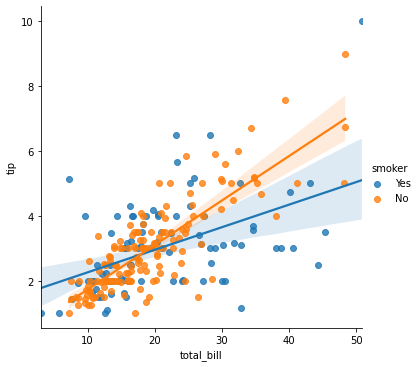

In [165]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", data = df);

Toplam hesap, bahşiş ve sigara içme durumu arasındaki doğrusal ilişki çizdirilen grafikte gözlemlenmektedir. Gözlemlediği üzere yüksek hesaplar miktarlarında sigara içmeyen müşterilerin, sigara içenlere göre, daha fazla bahşiş verdiği yorumu yapılabilir.

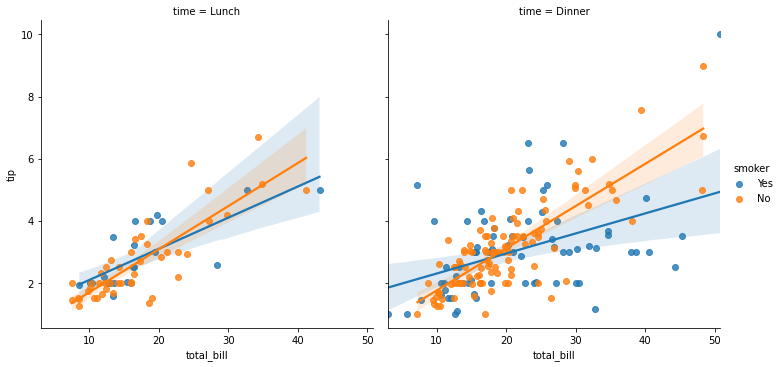

In [166]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", data = df);

col argümanı sütunlara göre iki grafik oluşturur.

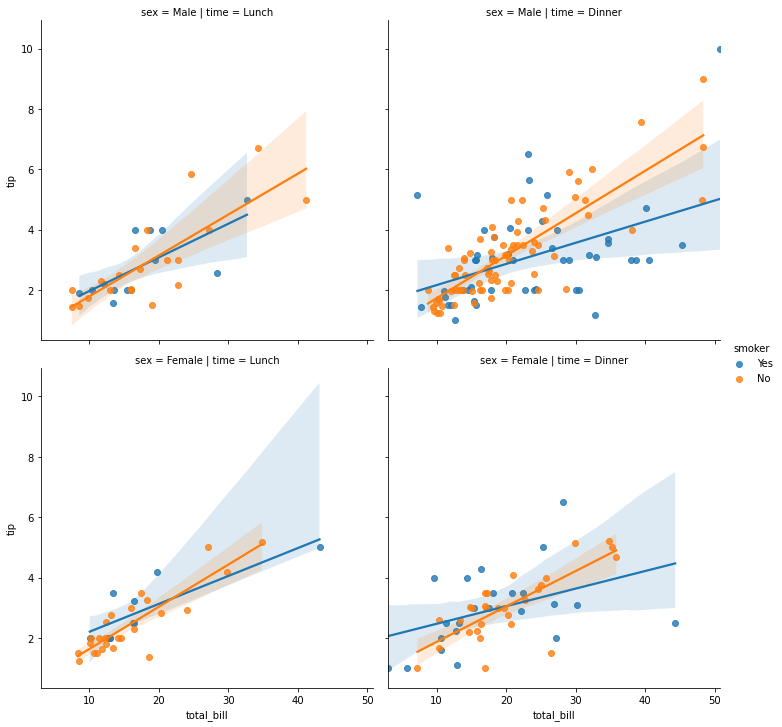

In [167]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", row = "sex", data = df);

row argümanı satırlara göre iki grafik oluşturur.

## Scatter Plot Matrisi

In [168]:
import seaborn as sns
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [170]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [172]:
df.shape

(150, 5)

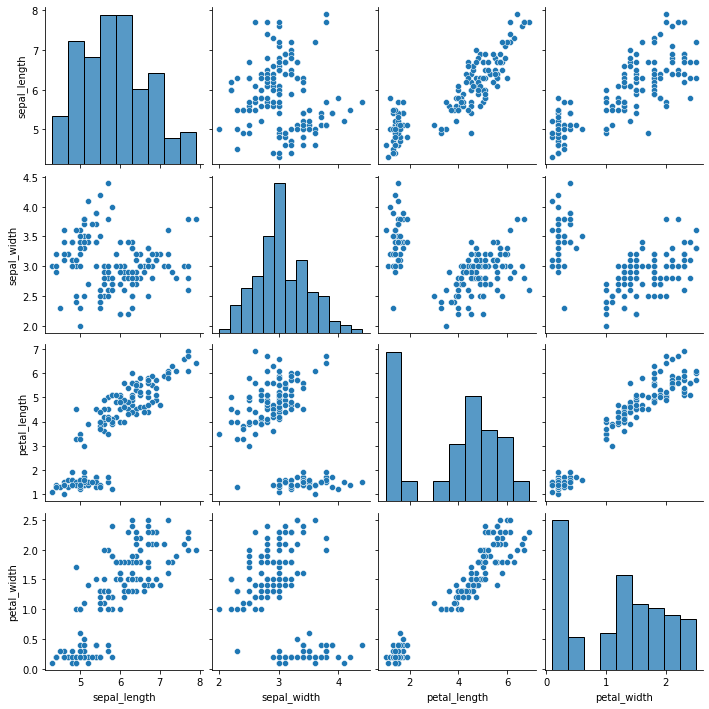

In [173]:
sns.pairplot(df);

Eksende yer alan grafikler veri seti içerisinde yer alan değişkenlerin dağılımlarını gösterir. Diğer grafikler iki değişken arasındaki ilişkiyi gösterir.

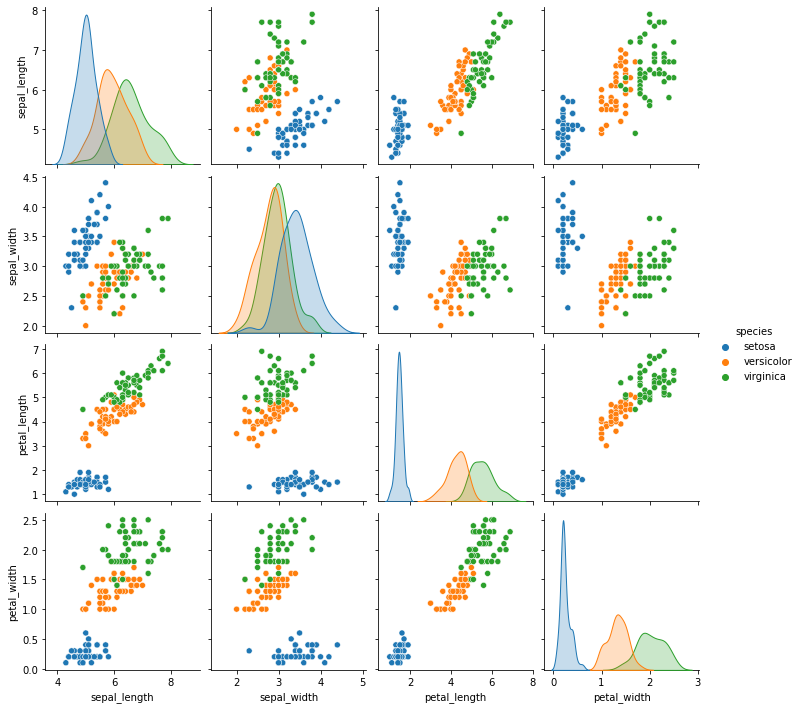

In [174]:
sns.pairplot(df, hue = "species");

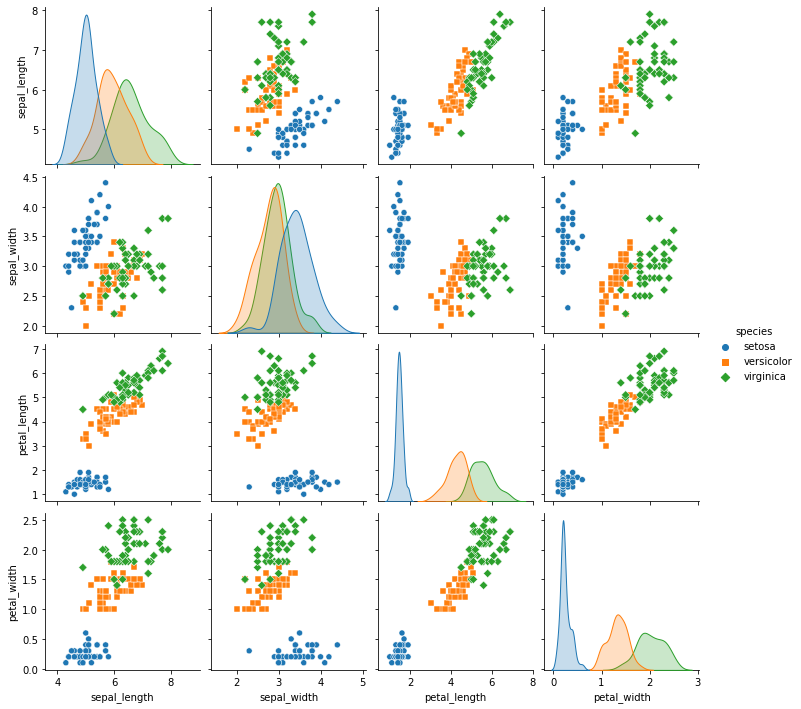

In [175]:
sns.pairplot(df, hue = "species", markers = ["o", "s", "D"]);

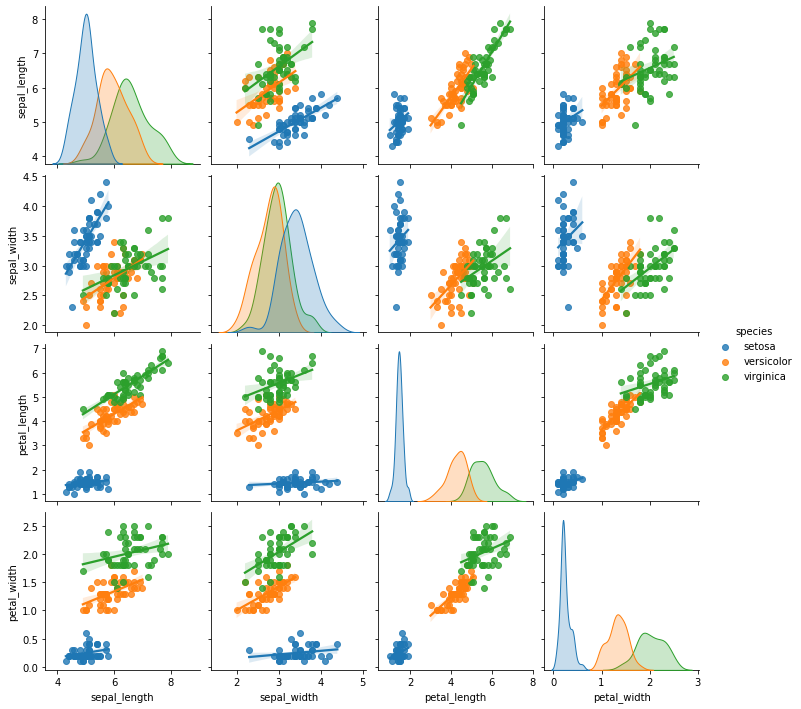

In [178]:
sns.pairplot(df, hue = "species", kind = "reg");

# Isı Haritası (Heat Map)

In [251]:
import seaborn as sns
flights = sns.load_dataset("flights")
df = flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [252]:
df.shape

(144, 3)

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [254]:
df["passengers"].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [255]:
df = df.pivot("month", "year", "passengers");

In [256]:
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


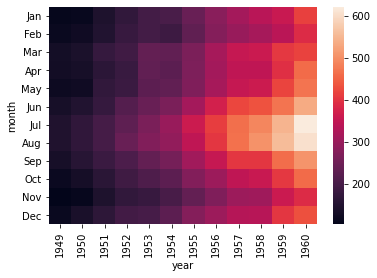

In [257]:
sns.heatmap(df);

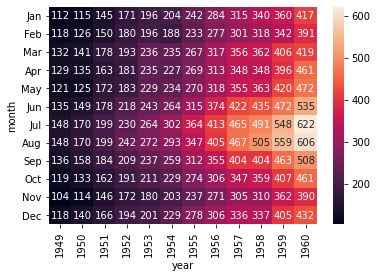

In [258]:
sns.heatmap(df, annot = True, fmt ="d");

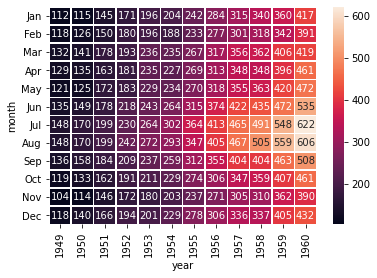

In [259]:
sns.heatmap(df, annot = True, fmt ="d", linewidths = .5);

# Çizgi Grafik

In [1]:
import seaborn as sns
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [199]:
df.shape

(1064, 5)

In [200]:
df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [201]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [202]:
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [204]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


## Çizgi Grafiğin Oluşturulması

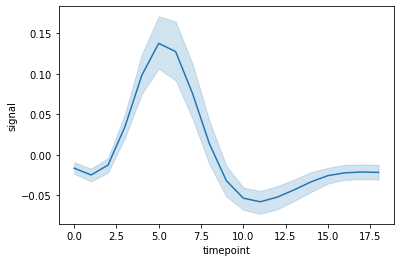

In [205]:
sns.lineplot(x = "timepoint", y = "signal", data = df);

Zaman noktalarına göre sinyallerin artış-azalış bilgileri gözlemlenmektedir.

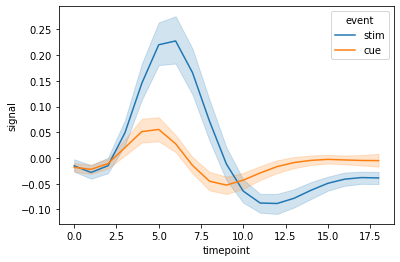

In [207]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", data = df);

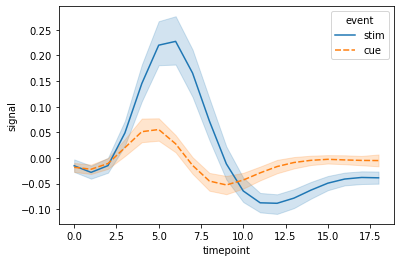

In [208]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", style = "event", data = df);

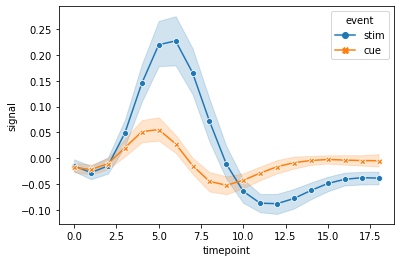

In [209]:
sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "event", 
             style = "event",
             markers = True,
             dashes = False,
             data = df);

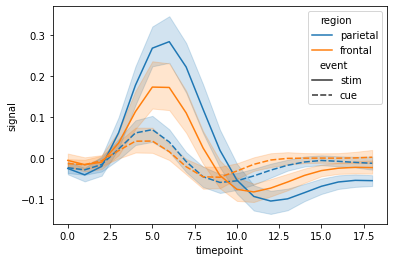

In [211]:
sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "region",
             style = "event",
             data = df);

# Basit Zaman Serisi Grafiği

In [212]:
!pip install pandas.datareader
import pandas_datareader as pr

In [218]:
df = pr.get_data_yahoo("AAPL", start = "2016-01-01", end = "2020-02-14")

In [219]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-10,80.387497,78.462502,78.544998,80.387497,109348800.0,79.769165
2020-02-11,80.974998,79.677498,80.900002,79.902496,94323200.0,79.287888
2020-02-12,81.805000,80.367500,80.367500,81.800003,113730400.0,81.170799
2020-02-13,81.555000,80.837502,81.047501,81.217499,94747600.0,80.592773
2020-02-14,81.495003,80.712502,81.184998,81.237503,80113600.0,80.612625


In [220]:
df.shape

(1037, 6)

In [221]:
kapanis = df["Close"]

In [222]:
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

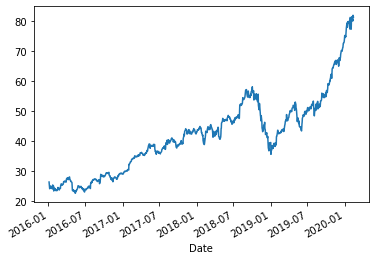

In [223]:
kapanis.plot();

In [225]:
kapanis.index = pd.DatetimeIndex(kapanis.index)

Buradaki index zaten zaman değişkeni bu yüzden bu işlemi yapmaya gerek yok fakat yukarıdaki kod bloğu indexi zaman indexine dönüştürmektedir.

In [226]:
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

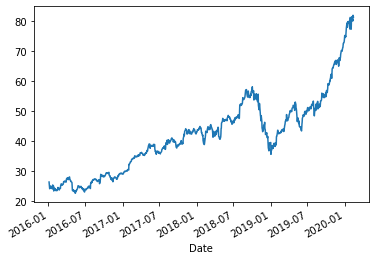

In [227]:
kapanis.plot();

# Bölüm Sonu Değerlendirmesi

Kategorik değişkenler için;
* Sütun Grafik

Sayısal değişkenler için;
* Histogram
* Box Plot